<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Eigenenergies Through Matrix Diagonalization
## Examples - Quantum Mechanics
<section class="post-meta">
By Henning G. Hugdal, Håkon W. Ånes and Jon Andreas Støvneng
</section>
Last edited: January 19th 2019
___

In a couple of previous quantum mechanics examples, we have found the eigenenergies of the system by using shooting methods. In this example, however, we will find the eigenenergies of a system by reformulating the problem to a linear system of equations, and find the energies by finding the eigenvalues of the resulting matrix using functions in `numpy.linalg` [[1]](#rsc). We begin by discretizing the Schrödinger equation in order to get a linear system of equations.

The Schrödinger in one dimension equation reads

\begin{equation}
-\frac{\hbar^2}{2m}\frac{d^2}{d x^2} \psi(x) + V(x)\psi(x) = E\psi(x).
\end{equation}

First of all we discretize the $x$-axis by letting $x \rightarrow x_i = x_{min} + i\cdot \Delta x$, where $\Delta x = (x_{max} - x_{min})/(N-1)$, $ i \in [0, N-1] $ and $N$ is the number of gridpoints. We also use the notation for the function values with discrete arguments, $\psi(x_i) = \psi_i$ and $V(x_i) = V_i$.
Using second order central differences for the second derivative term,
$$ \frac{d^2}{d x^2}\psi(x_i) \rightarrow \frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2},$$
we finally get the discretized Schrödinger equation,

\begin{equation}
-\frac{\hbar^2}{2m}\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta x^2} + V_i \psi_i = E \psi_i.
\end{equation}

In the following we will set $\hbar=m=1$ for simplicity. This means that the matrix describing our system will have $1/\Delta x^2 + V_i$ along the main diagonal, and $-1/\Delta_x^2$ along the first diagonals below and above the main diagonal. Denoting the matrix containing these elements $\bar{H}$, and the vector of $\psi_i$'s $\vec{\psi}$, we get the following linear system of equations:
$$\bar{H}\vec{\psi} = E\vec{\psi}.$$

### Harmonic Oscillator

First we will solve this system of equations using the harmonic oscillator potential,
$$ V(x) = \frac{1}{2}x^2,$$
where $m$ and $\omega$ are set to $1$. Note that in order to solve this problem we will limit the values on the $x$-axis to a finite interval, even though the wavefunction can in principle be non-zero on the entire $x$-axis. However, for the lowest energy eigenstates, this is not a very restrictive approximation. Notice also that since $\bar{H}$ is a $N\times N$-matrix means that we will only find the $N$ lowest eigenenergies.

Let's import the necessary libraries and define the matrix $\bar{H}$.

In [2]:
from __future__ import division
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt


# Number of grid points
N = 100

# Interval on the x-axis:
x_min = -5
x_max = 5

dx = (x_max-x_min)/(N-1)

# Grid points
x = np.arange(x_min, x_max+dx, dx)

# Potential
V = 0.5*x**2

# We define a N-by-N zero matrix:
H = np.zeros((N, N))

# Set the non-zero elements of the matrix:
for i in range(N):
    H[i][i] = (1/dx**2+V[i])
    if i > 0:
        H[i][i-1] = -1/(2*dx**2)
    if i < N-1:
        H[i][i+1] = -1/(2*dx**2)

Since $\bar{H}$ is symmetric, we can use the `linalg` function `eigvalsh(H)` which returns the eigenvalues of $\bar{H}$ [[1]](#rsc). Below the eigenvalues are calculated, and the 10 first eigenvalues are written out.

In [5]:
E = linalg.eigvalsh(H)

# Print the 10 first eigenvalues:
for i in range(10):
    Estr = "E" + str(i) + ": "
    print(Estr, E[i])

E0:  0.499680951302
E1:  1.49840394069
E2:  2.49584790183
E3:  3.49201079155
E4:  4.48689426143
E5:  5.48052575052
E6:  6.47306976041
E7:  7.46525099893
E8:  8.45953429504
E9:  9.46235519413


We see that this corresponds very well to the exact energies of the harmonic oscillator, $E_n = (\frac{1}{2} + n)$. Notice however that the error increases with increasing energies, because the approximation done when limiting the $x$-interval used becomes worse for higher eigenstates.

### Asymmetric Potential

In the notebook "[Numerical Determination of Eigenenergies for an Asymmetric Potential](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/asymmetric_potential.ipynb)" we found the eigenenergies for the three lowest eigenstates for a asymmetric potential,

\begin{equation}
V(x) = ax^4 - b(x+c)^2 + d,
\end{equation}

with $a=1$, $b=1.5$, $c=0.2$ and $d=1.17$. As a control of these results we can use the method used above to determine the same eigenenergies. Here we will also determine the eigenfunctions in order to compare these to the ones obtained in the notebook mentioned above. This means using `linalg.eigh()` instead og `linalg.eigvalsh()`.

In [8]:
# Use the same values as in Example 6.6
N = 1000
x_min = -10
x_max = 10
dx = (x_max - x_min)/(N-1)
x = np.arange(x_min, x_max+dx, dx)

# Set the potential
a = 1
b = 1.5
c = 0.2
d = 1.17

V = a*x**4 - b*(x + c)**2 + d

# We define a N-by-N zero matrix:
H = np.zeros((N, N))

# Set the non-zero elements of the matrix:
for i in range(N):
    H[i][i] = (1/dx**2+V[i])
    if i > 0:
        H[i][i-1] = -1/(2*dx**2)
    if i < N-1:
        H[i][i+1] = -1/(2*dx**2)

# Determine the eigenenergies and the eigenvectors
E, psi = linalg.eigh(H)

# Print the 3 first eigenvalues:
for i in range(3):
    Estr = "E" + str(i) + ": "
    print(Estr, E[i])

E0:  1.09088535698
E1:  2.3284089096
E2:  4.21060273968


We see that this corresponds very well to the values found in Example 6.6. Below we plot the eigenfunctions of the three lowest eigenenergies.

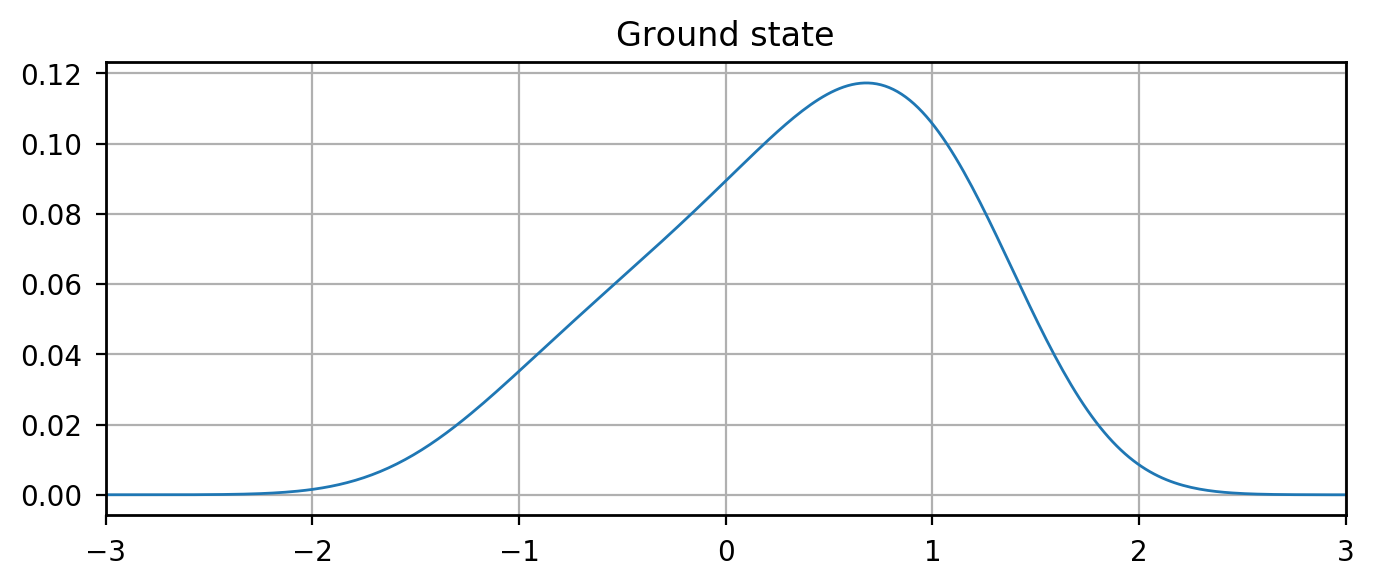

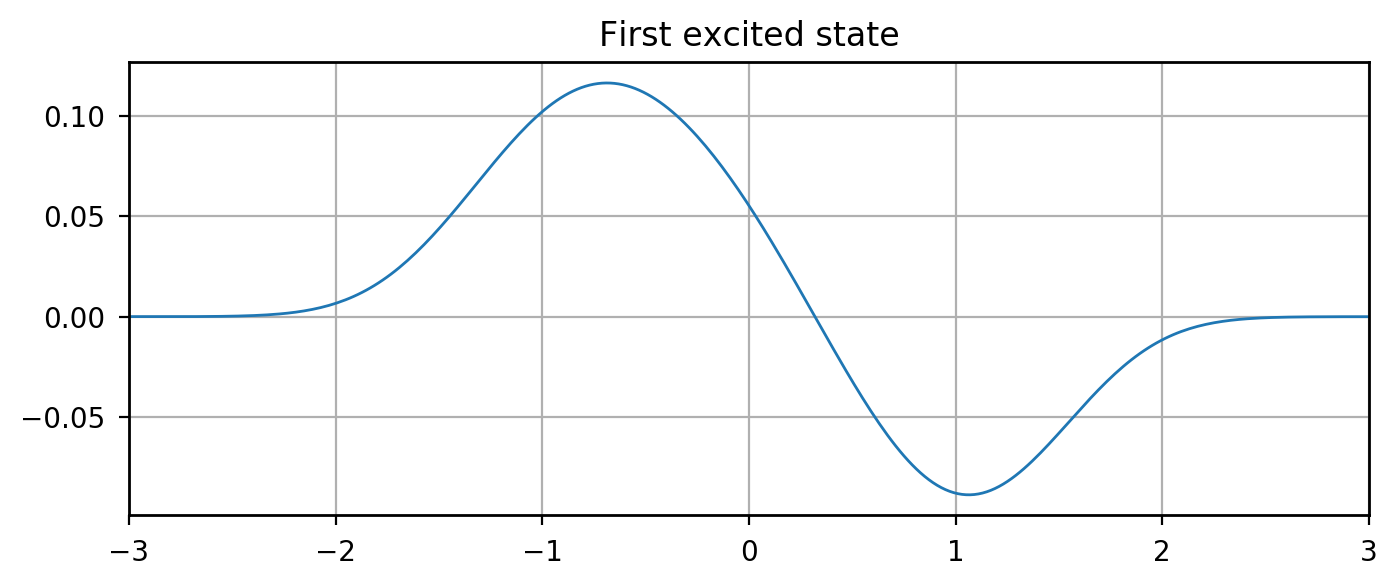

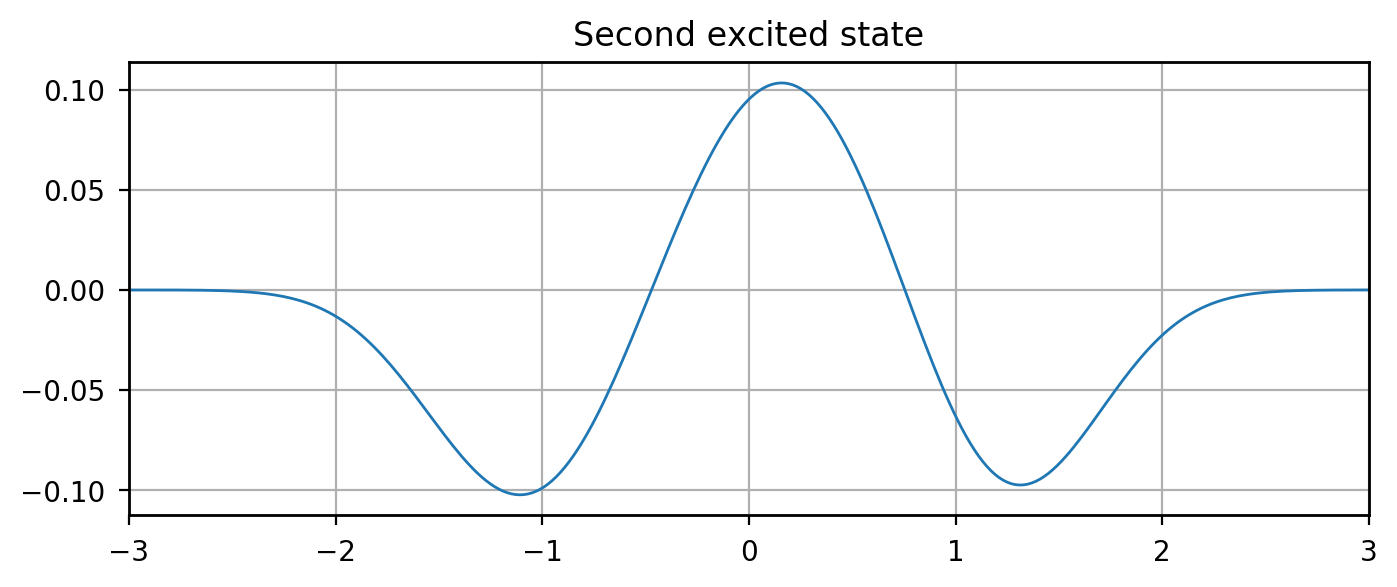

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set common figure parameters:
newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 3),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 10, 'legend.frameon': False, 
             'legend.handlelength': 1.5, 'figure.dpi': 200}
plt.rcParams.update(newparams)

# Plot three lowest eigenstates
plt.figure()
plt.title("Ground state")
plt.plot(x, psi[:, 0])
plt.xlim([-3, 3])
plt.grid()
plt.figure()
plt.title("First excited state")
plt.plot(x, -psi[:, 1])
plt.xlim([-3, 3])
plt.grid()
plt.figure()
plt.title("Second excited state")
plt.plot(x, psi[:, 2])
plt.xlim([-3, 3])
plt.grid();

We see also the eigenfunctions correspond well to the ones determined in previous notebook. 

It should also be noted that this is a far more efficient and simple way to solve the above problem!

<a id="rsc"></a>
___
## References

<a>[1]</a> `numpy.linalg` [documentation](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html)